In [57]:
#!/usr/bin/env R
install.packages("stemmatology")
?'stemmatology-package'

Updating HTML index of packages in '.Library'

Making 'packages.html' ...
 done



stemmatology           package:stemmatology            R Documentation

_A_n _R _S_t_e_m_m_a_t_o_l_o_g_y _P_a_c_k_a_g_e

_D_e_s_c_r_i_p_t_i_o_n:

     Build and analyse the genealogy of textual or musical traditions.

_D_e_t_a_i_l_s:

       Package:  stemmatology 
       Type:     Package      
       Version:  0.3.0        
       Date:     2018-05-20   
       License:  GPL-3        
      
     _Stemmatology_ is the name of the field dedicated to studying text
     genealogies and establishing genealogical tree-like graphs known
     as stemma codicum.

     This package includes various functions for stemmatological
     analysis.

  _I_n_p_u_t:

       Most of the functions take, as input a _numeric matrix_, with
       witnesses in columns, variant locations in rows, and readings
       coded by a number, e.g.

            A  B  C  D  E   H  I  J   K  O 
         1  0  1  1  1  NA  1  1  NA  1  1 
         2  1  1  1  1  NA  1  1  NA  1  1 
         3  1  1  1  1  NA  1  1  NA  1  1 
         4  1  1  1  2  NA  1  1  NA  1  1 
         5  1  1  1  2  NA  1  1  NA  1  1 
         6  1  1  1  1  NA  1  1  NA  1  1 
        
       where A, B, …, O are the various witnesses in columns, 1…6 the
       various variant locations, in rows, and the different readings
       are coded either 0 (omission), 1, 2, …, _n_. ‘NA’ is used for
       the lack of information (physical lacuna, absence of
       observation, variant location not applicable to a given witness,
       etc.).

       Alternatively , if ‘alternateReadings = TRUE’, the input can be
       a _character matrix_, with witnesses in columns, variant
       locations in rows, and, in each cell, one or several readings,
       coded by numbers and separated by a comma (e.g. '1,2,3', if the
       witness has three different readings), e.g.

            A      D      F      T    P     
         1  "1"    "2"    "2"    "2"  "1,2" 
         2  "1"    "2"    "1,2"  "2"  "1"   
         3  "1"    "1"    "1"    "1"  "2"   
         4  "1,3"  "1,2"  "1"    "2"  "3"   
        
       Notice how a witness can bear several readings (e.g., P at VL
       1).


  _C_r_e_a_t_e _o_r _i_m_p_o_r_t _d_a_t_a:

       Data can be created inside R or imported. They can be imported
       by reading a csv file, for instance (e.g. with ‘read.csv’). They
       can also be imported from a TEI encoded apparatus in
       parallel-segmentation, either by using an XSL stylesheet, or the
       built-in function ‘import.TEIApparatus’.

       The function ‘import.TEIApparatus’ allows to import a TEI P5
       encoded apparatus into a stemmatological matrix usable with
       other functions. It has some parameters to refine the import
       (variant types, …), and can read either from disk or from an
       URL.


  _P_C_C _M_e_t_h_o_d:

       Functions are made available for the PCC method (See Camps and
       Cafiero 2014 or ‘PCC’ for more details). The most important are

       ‘PCC’: global shell for the PCC functions

       ‘PCC.Exploratory’: global function for exploratory methods of
       the PCC family

       ‘PCC.Stemma’: Building the Stemma Codicum.


  _O_t_h_e_r _f_u_n_c_t_i_o_n_s:

       The package contains also various other functions, particularly
       aimed at detecting contamination. It contains for instance the
       function ‘PCC.contam’.

       The package aims at making available various other
       stemmatological methods, including further functions for
       contamination detection, or for theoretical stemmatology.


_N_o_t_e:

     Please report issues with this package to
     <https://github.com/Jean-Baptiste-Camps/stemmatology>.

_A_u_t_h_o_r(_s):

     Jean-Baptiste Camps (École nationale des chartes | Université
     PSL).

     Florian Cafiero.

     Maintainer: Jean-Baptiste Camps <<mailto:jbcamps@hotmail.com>>.

_R_e_f_e_r_e_n_c_e_s:

     C

In [48]:
library("stemmatology")
library("stringr")
aff = import.TEIApparatus(file = "output/l319-349_A-B-F-Hr-K-L-P-T-V-W-X.xml",appTypes = c("todo"))


In [55]:
length(aff) #juste pour vérifier

# Clean colnames (keep only the final part after the last '_'
colnames(aff) <- str_replace(colnames(aff), '.*_', '')
colnames(aff)

[1] 1408

[1] "A"  "B"  "F"  "Hr" "K"  "L"  "P"  "T"  "V"  "W"  "X"

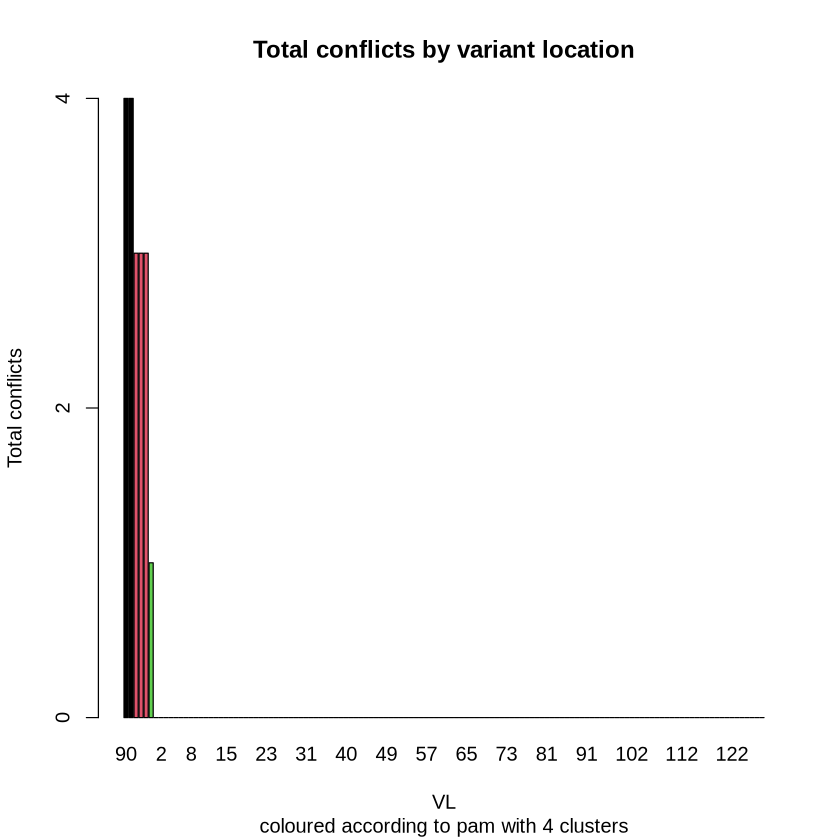

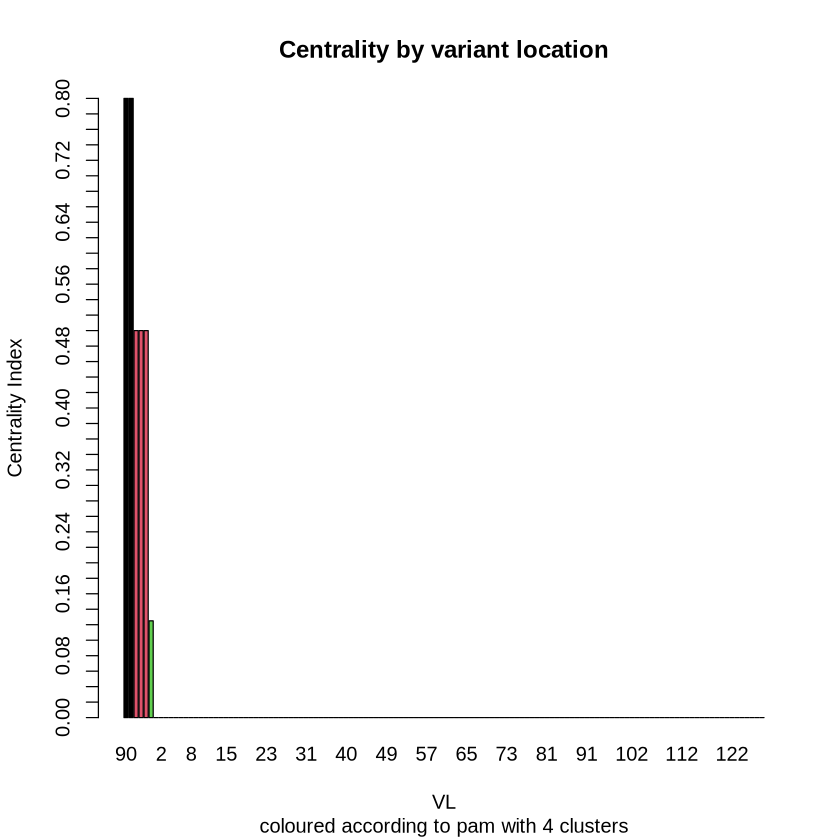

There is absolutely no conflicts in this database.



ERROR: Error in PCC.equipollent(myConflicts, ask = FALSE, scope = "T"): No conflicts in input. PCC.equipollent will stop.


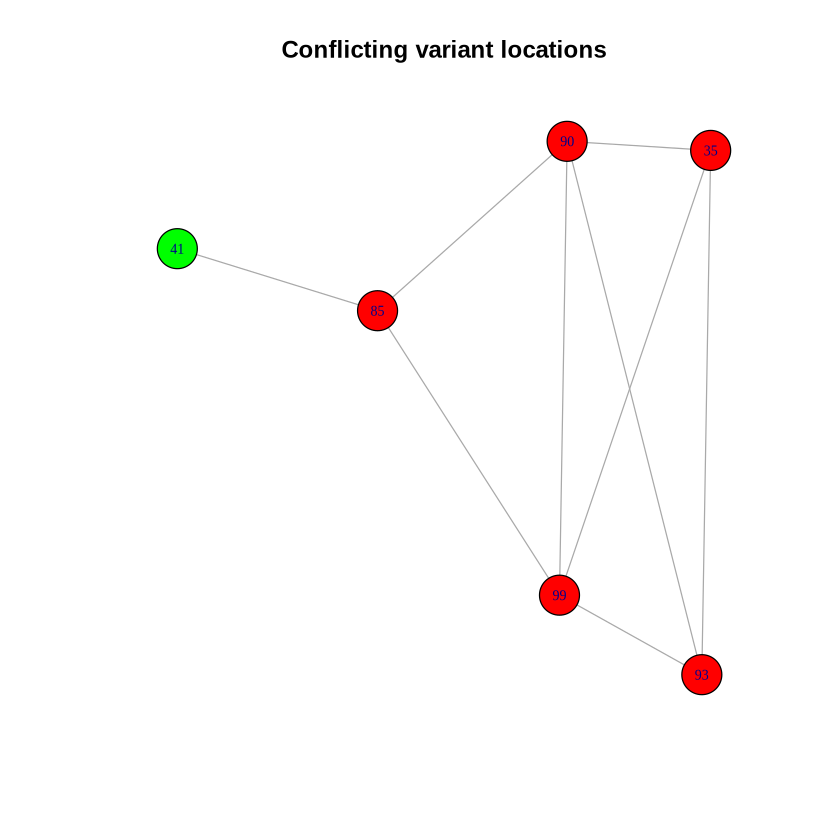

In [69]:
# look for conflicts
myConflicts = PCC.conflicts(aff)
# remove conflicting VL
myConflicts = PCC.overconflicting(myConflicts, ask = FALSE, threshold = 0.34)
myNewData = PCC.elimination(myConflicts)
# look for competing genealogies
myConflicts = PCC.conflicts(myNewData)
myNewData = PCC.equipollent(myConflicts, ask = FALSE, scope = "T")
# build a stemma
PCC.Stemma(myNewData$databases[[1]], ask = FALSE)

#PCC(aff)